# Hubway Challegence



## Libraries

These are the libraries that I'm going to use during the exploration process 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

Let's load the two dataset provided by the challagence


In [3]:
stations = pd.read_csv("dataset/hubway_stations.csv")
trips = pd.read_csv("dataset/hubway_trips.csv")

In [8]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 7 columns):
id           142 non-null int64
terminal     142 non-null object
station      142 non-null object
municipal    142 non-null object
lat          142 non-null float64
lng          142 non-null float64
status       142 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 7.8+ KB


In [7]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1579025 entries, 0 to 1579024
Data columns (total 13 columns):
seq_id        1579025 non-null int64
hubway_id     1579025 non-null int64
status        1579025 non-null object
duration      1579025 non-null int64
start_date    1579025 non-null object
strt_statn    1579011 non-null float64
end_date      1579025 non-null object
end_statn     1578980 non-null float64
bike_nr       1578559 non-null object
subsc_type    1579025 non-null object
zip_code      1106259 non-null object
birth_date    350644 non-null float64
gender        1106414 non-null object
dtypes: float64(3), int64(3), object(7)
memory usage: 156.6+ MB


From the last dataset we can see that this has some null values, specially in these features:
+ strt_statn
+ strt_statn
+ zip_code
+ birth_date
+ gender

## First Look at the Data


In [54]:
trips.head()

,seq_id,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender
0,1,8,Closed,9,7/28/2011 10:12:00,23.0,7/28/2011 10:12:00,23.0,B00468,Registered,'97217,1976.0,Male
1,2,9,Closed,220,7/28/2011 10:21:00,23.0,7/28/2011 10:25:00,23.0,B00554,Registered,'02215,1966.0,Male
2,3,10,Closed,56,7/28/2011 10:33:00,23.0,7/28/2011 10:34:00,23.0,B00456,Registered,'02108,1943.0,Male
3,4,11,Closed,64,7/28/2011 10:35:00,23.0,7/28/2011 10:36:00,23.0,B00554,Registered,'02116,1981.0,Female
4,5,12,Closed,12,7/28/2011 10:37:00,23.0,7/28/2011 10:37:00,23.0,B00554,Registered,'97214,1983.0,Female


## Questions and Answers About the Data

### Who’s using the bikes?

_More men or more women?_

In [27]:
pd.crosstab(trips.loc[:,'gender'], trips.loc[:,'gender'])

gender,Female,Male
gender,,
Female,271700,0
Male,0,834714


We can conclude that the number of male is higher than the reports made by women.

_Older or younger people?_

In [53]:
age = 2013 - trips.loc[:,'birth_date']
age = age.dropna().copy()
age_period = []
for i in age:
    age_period.append("young" if i<35 else "old")
pd.crosstab(np.array(age_period),np.array(age_period))

col_0,old,young
row_0,,
old,165636,0
young,0,185008


We have more people registered that were young 

_Subscribers or one time users?_

In [55]:
pd.crosstab(trips.loc[:,'subsc_type'], trips.loc[:,'subsc_type'])

subsc_type,Casual,Registered
subsc_type,,
Casual,472611,0
Registered,0,1106414


Our data shows that registered values are more than the casual category

### Where are bikes being checked out?

_More in Boston than Cambridge?_

In [4]:
hubway_data_with_gps = trips.join(stations, lsuffix='id', rsuffix='strt_statn')
hubway_data_with_gps.head()

,seq_id,hubway_id,statusid,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender,id,terminal,station,municipal,lat,lng,statusstrt_statn
0,1,8,Closed,9,7/28/2011 10:12:00,23.0,7/28/2011 10:12:00,23.0,B00468,Registered,'97217,1976.0,Male,3.0,B32006,Colleges of the Fenway,Boston,42.340021,-71.100812,Existing
1,2,9,Closed,220,7/28/2011 10:21:00,23.0,7/28/2011 10:25:00,23.0,B00554,Registered,'02215,1966.0,Male,4.0,C32000,Tremont St. at Berkeley St.,Boston,42.345392,-71.069616,Existing
2,3,10,Closed,56,7/28/2011 10:33:00,23.0,7/28/2011 10:34:00,23.0,B00456,Registered,'02108,1943.0,Male,5.0,B32012,Northeastern U / North Parking Lot,Boston,42.341814,-71.090179,Existing
3,4,11,Closed,64,7/28/2011 10:35:00,23.0,7/28/2011 10:36:00,23.0,B00554,Registered,'02116,1981.0,Female,6.0,D32000,Cambridge St. at Joy St.,Boston,42.361285,-71.065140,Existing
4,5,12,Closed,12,7/28/2011 10:37:00,23.0,7/28/2011 10:37:00,23.0,B00554,Registered,'97214,1983.0,Female,7.0,A32000,Fan Pier,Boston,42.353412,-71.044624,Existing


In [81]:
pd.crosstab(hubway_data_with_gps[hubway_data_with_gps.municipal.isin(["Boston", "Cambridge"])].municipal, 
            hubway_data_with_gps[hubway_data_with_gps.municipal.isin(["Boston", "Cambridge"])].municipal)

municipal,Boston,Cambridge
municipal,,
Boston,97,0
Cambridge,0,28


In [5]:
counter_df = pd.DataFrame(hubway_data_with_gps.station.value_counts())
counter_df.reset_index(inplace=True)
counter_df.columns = ['station', 'count']
counter_df.head()

,station,count
0,Andrew Station - Dorchester Ave at Humboldt Pl,2
1,Charles Circle - Charles St. at Cambridge St.,2
2,Dudley Square,2
3,Boylston at Fairfield,2
4,Mayor Thomas M. Menino - Government Center,2


In [7]:
hubway_data_with_gps = hubway_data_with_gps.join(counter_df, lsuffix='station', rsuffix='station')        
hubway_data_with_gps.head(3)    

,seq_id,hubway_id,statusid,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,...,gender,id,terminal,stationstation,municipal,lat,lng,statusstrt_statn,stationstation,count
0,1,8,Closed,9,7/28/2011 10:12:00,23.0,7/28/2011 10:12:00,23.0,B00468,Registered,...,Male,3.0,B32006,Colleges of the Fenway,Boston,42.340021,-71.100812,Existing,Andrew Station - Dorchester Ave at Humboldt Pl,2.0
1,2,9,Closed,220,7/28/2011 10:21:00,23.0,7/28/2011 10:25:00,23.0,B00554,Registered,...,Male,4.0,C32000,Tremont St. at Berkeley St.,Boston,42.345392,-71.069616,Existing,Charles Circle - Charles St. at Cambridge St.,2.0
2,3,10,Closed,56,7/28/2011 10:33:00,23.0,7/28/2011 10:34:00,23.0,B00456,Registered,...,Male,5.0,B32012,Northeastern U / North Parking Lot,Boston,42.341814,-71.090179,Existing,Dudley Square,2.0


In [12]:
from folium.plugins import HeatMap
import folium

def generateBaseMap(default_location=[42.340021, -71.100812], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

base_map = generateBaseMap()
HeatMap(data=hubway_data_with_gps[['lat', 'lng', 'count']].groupby(['lat', 'lng']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)
base_map


The data shows that the trips were done at Boston.

_More in commercial or residential?_

It is presented in commercial areas.

_More around tourist attractions?_

Yes, the data allows us to understand that the trips were around tourist attractions (according to https://www.planetware.com/tourist-attractions-/boston-us-ma-boston.htm)

### When are the bikes being checked out?

More during the weekend than on the weekdays?

_what are the hours of high checkouts?_

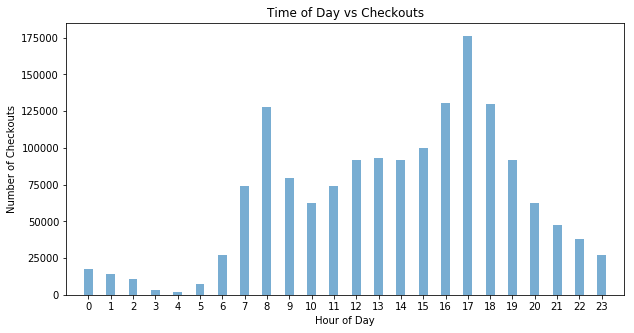

In [16]:
check_out_hours = trips['start_date'].apply(lambda s: int(s[-8:-6]))

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

check_out_counts = np.unique(check_out_hours, return_counts=True)
ax.bar(check_out_counts[0], check_out_counts[1], align='center', width=0.4, alpha=0.6)
ax.set_xlim([-1, 24])
ax.set_xticks(range(24))
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of Checkouts')
ax.set_title('Time of Day vs Checkouts')

plt.show()

## References

+ https://towardsdatascience.com/data-101s-spatial-visualizations-and-analysis-in-python-with-folium-39730da2adf